In [204]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [205]:
path = "/content/drive/MyDrive/practise/Cars24_1.csv"

In [206]:
df = pd.read_csv(path)

In [207]:
df.head(5)

,ID,Car Brand,Model,Price,Model Year,Location,Fuel,Driven (Kms),Gear,Ownership,EMI (monthly)
0,0,Hyundai,EonERA PLUS,"£330,399.00",2016,Hyderabad,Petrol,10674KM,Manual,2,7350
1,1,Maruti,Wagon R 1.0LXI,"£350,199.00",2011,Hyderabad,Petrol,20979KM,Manual,1,7790
2,2,Maruti,Alto K10LXI,"£229,199.00",2011,Hyderabad,Petrol,47330KM,Manual,2,5098
3,3,Maruti,RitzVXI BS IV,"£306,399.00",2011,Hyderabad,Petrol,19662KM,Manual,1,6816
4,4,Tata,NanoTWIST XTA,"£208,699.00",2015,Hyderabad,Petrol,11256KM,Automatic,1,4642


In [208]:
df.shape

(5918, 11)

In [ ]:
df.dtypes

# **1. Take appropriate action for the “Price” & “Driven (Kms)” columns.**

In [211]:
df["Price"] = df["Price"].str.replace("£","").str.replace(",","").astype(float)

In [212]:
df.dtypes


ID                 int64
Car Brand         object
Model             object
Price            float64
Model Year         int64
Location          object
Fuel              object
Driven (Kms)      object
Gear              object
Ownership          int64
EMI (monthly)      int64
dtype: object

In [213]:
df["Driven (Kms)"] =df["Driven (Kms)"].str.replace("KM","").astype(int)

In [214]:
df.dtypes

ID                 int64
Car Brand         object
Model             object
Price            float64
Model Year         int64
Location          object
Fuel              object
Driven (Kms)       int64
Gear              object
Ownership          int64
EMI (monthly)      int64
dtype: object

# **2. Retrieve all car details where the EMI price is greater than the median price of EMI for all listed cars and less than the mean price of EMI for all listed cars.**

In [215]:
median_1 = df['EMI (monthly)'].median()

In [216]:
median_1

9574.0

In [217]:
mean_1 = df["EMI (monthly)"].mean()

In [218]:
mean_1

11523.801284217641

In [219]:
x1 = df[(df["EMI (monthly)"]>median_1) & (df["EMI (monthly)"]<mean_1)]

In [220]:
x1

,ID,Car Brand,Model,Price,Model Year,Location,Fuel,Driven (Kms),Gear,Ownership,EMI (monthly)
28,28,Maruti,Eeco5 STR WITH AC PLUSHTR,452799.0,2019,Hyderabad,Petrol,15398,Manual,1,10072
31,31,Renault,KwidRXT 1.0 EASY-R AT OPTION,480999.0,2019,Hyderabad,Petrol,17078,Automatic,1,10700
46,46,Hyundai,Grand i10SPORTS 1.2 VTVT,498899.0,2017,Hyderabad,Petrol,18950,Manual,2,11098
54,54,Hyundai,Grand i10SPORTS 1.2 VTVT,461599.0,2015,Hyderabad,Petrol,45191,Manual,1,10268
69,69,Maruti,Eeco5 STR WITH AC PLUSHTR,493799.0,2019,Hyderabad,Petrol,9128,Manual,1,10984
...,...,...,...,...,...,...,...,...,...,...,...
5867,5867,Maruti,SwiftVXI,464399.0,2014,Chennai,Petrol,3600,Manual,1,10330
5879,5879,Mahindra,Kuv100K6+ D 6 STR,449199.0,2016,Chennai,Diesel,33817,Manual,1,9992
5882,5882,Honda,Amaze1.2 SMT I VTEC,506299.0,2015,Chennai,Petrol,32638,Manual,1,11262
5898,5898,Honda,Jazz1.2 V AT,483099.0,2015,Chennai,Petrol,81461,Automatic,2,10746


# **3. How many car names start with Alto?**

In [221]:
df[(df["Model"].str[0:4]=="Alto")].shape[0]

588

# **4. Cars24 CEO wants to know For each car brand, what is the average price of cars with manual gears, and what is the average price of cars with automatic gears? Is there a significant price difference between the two types?*****

In [ ]:
x1 = df[(df["Gear"]=="Manual")]
x = x1.groupby(["Car Brand"])["Price"].mean().sort_values(ascending = False)
x

In [ ]:
x2 = df[(df["Gear"]=="Automatic")]
x_ = x2.groupby(["Car Brand"])["Price"].mean().sort_values(ascending = False)
x_

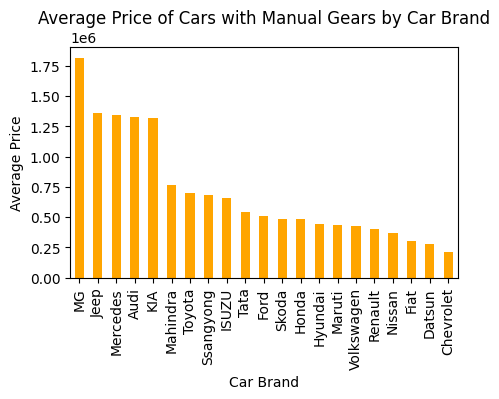

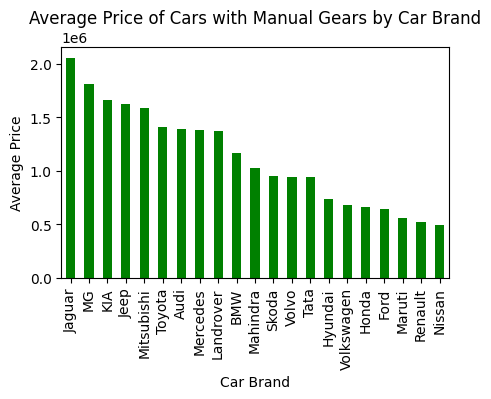

In [224]:
x.plot(kind="bar", figsize=(5,3), color="orange")
plt.title("Average Price of Cars with Manual Gears by Car Brand")
plt.xlabel("Car Brand")
plt.ylabel("Average Price")
plt.xticks(rotation=90)
plt.show()

x_.plot(kind="bar", figsize=(5,3), color="Green")
plt.title("Average Price of Cars with Manual Gears by Car Brand")
plt.xlabel("Car Brand")
plt.ylabel("Average Price")
plt.xticks(rotation=90)
plt.show()

# **5. Which fuel type is the most common among the listed cars? Are there any other particular fuel types that are gaining popularity?**

In [225]:
df["Fuel"].value_counts()

Petrol          3787
Diesel          1964
Petrol + CNG     147
Petrol + LPG      18
Electric           2
Name: Fuel, dtype: int64

# **6. Which city has the highest average car price, and which one has the lowest?**

In [226]:
print("highest", df.groupby("Location")["Price"].mean().sort_values(ascending = False))


print("lowest", df.groupby("Location")["Price"].mean().sort_values(ascending = True))

highest Location
Mumbai       574183.495455
Delhi        510264.467128
Bangalore    492786.663017
Chennai      468923.825733
Hyderabad    445251.743902
Name: Price, dtype: float64
lowest Location
Hyderabad    445251.743902
Chennai      468923.825733
Bangalore    492786.663017
Delhi        510264.467128
Mumbai       574183.495455
Name: Price, dtype: float64


# **7. Is there any correlation between the number of kilometers driven and the car's price? Do cars with lower mileage tend to have higher prices?*****

In [227]:
x = df[["Driven (Kms)","Price"]].corr()
x

,Driven (Kms),Price
Driven (Kms),1.00000,-0.09132
Price,-0.09132,1.00000


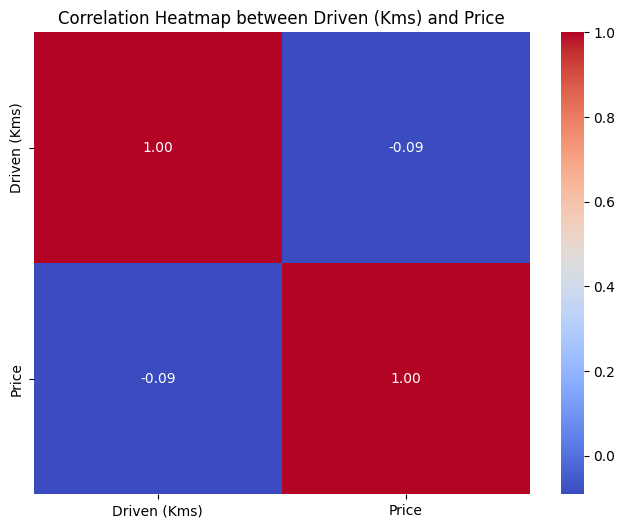

In [228]:
plt.figure(figsize=(8, 6))
sns.heatmap(x, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap between Driven (Kms) and Price")
plt.show()

The correlation coefficient of -0.09132 suggests a weak negative correlation between "Driven (Kms)" and "Price."
This means that as the number of kilometers driven increases, the price tends to slightly decrease, and vice versa. However, the relationship is weak, indicating that the two variables are not strongly related in a linear manner.

# **8. What is the present average age (in years) of cars in the dataset? How does the average age differ for different car brands?*****

In [229]:
df["Age"] = pd.Timestamp.now().year - df["Model Year"]

In [230]:
x = df.groupby("Car Brand")["Age"].mean().sort_values(ascending = False)

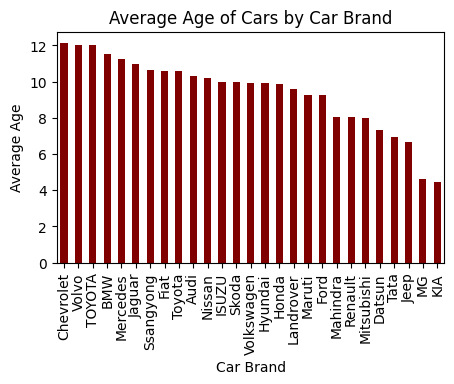

In [231]:
x.plot(kind = "bar", figsize = (5,3),color = "maroon")
plt.title("Average Age of Cars by Car Brand")
plt.xlabel("Car Brand")
plt.ylabel("Average Age")
plt.xticks(rotation=90)
plt.show()

In [232]:
df.head(5)

,ID,Car Brand,Model,Price,Model Year,Location,Fuel,Driven (Kms),Gear,Ownership,EMI (monthly),Age
0,0,Hyundai,EonERA PLUS,330399.0,2016,Hyderabad,Petrol,10674,Manual,2,7350,8
1,1,Maruti,Wagon R 1.0LXI,350199.0,2011,Hyderabad,Petrol,20979,Manual,1,7790,13
2,2,Maruti,Alto K10LXI,229199.0,2011,Hyderabad,Petrol,47330,Manual,2,5098,13
3,3,Maruti,RitzVXI BS IV,306399.0,2011,Hyderabad,Petrol,19662,Manual,1,6816,13
4,4,Tata,NanoTWIST XTA,208699.0,2015,Hyderabad,Petrol,11256,Automatic,1,4642,9


# **9. What is the overall distribution of car ownership? Are there more first-hand owners or second-hand owners in the dataset?*****

In [233]:
x = df.groupby("Ownership")["ID"].count()

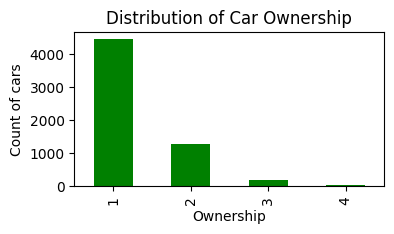

In [234]:
x.plot(kind = "bar",figsize = (4,2),color = "green")
plt.title("Distribution of Car Ownership")
plt.xlabel("Ownership")
plt.ylabel("Count of cars")
plt.xticks(rotation=90)
plt.show()


# **10. How does the average EMI amount change with car ownership? Do first-hand owners have different average EMIs compared to second-hand owners?*****

In [235]:
x1 = df.groupby("Ownership")['EMI (monthly)'].mean().sort_values(ascending = False)

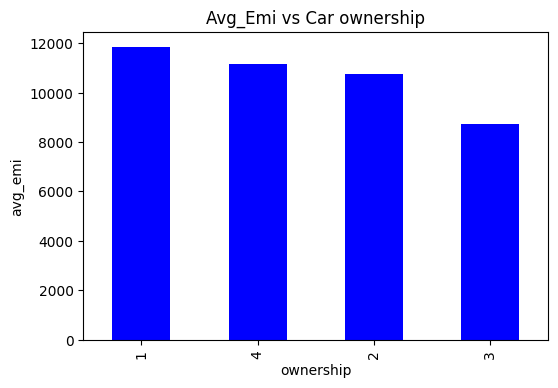

In [236]:
x1.plot(kind = "bar",figsize = (6,4), color = "blue")
plt.title("Avg_Emi vs Car ownership")
plt.xlabel("ownership")
plt.ylabel("avg_emi")
plt.show()

# **11. Is there any correlation between the “Model Year” and the number of kilometers it has been driven (Driven (Kms))?*****

In [237]:
x2 = df[["Model Year","Driven (Kms)"]].corr()
x2


,Model Year,Driven (Kms)
Model Year,1.000000,-0.408615
Driven (Kms),-0.408615,1.000000


The correlation coefficient of -0.408615 suggests a moderate negative correlation between "Model Year" and "Driven (Kms)."
This means that as the model year of a car increases (i.e., newer cars), the number of kilometers driven tends to decrease, and vice versa. However, the relationship is not very strong, indicating that the two variables are moderately related in a negative linear manner.





# **12. What are the top 5 car models with the highest monthly EMI amounts?n**

In [238]:
df.groupby("Model")["EMI (monthly)"].max().sort_values(ascending = False).head(5)

Model
Land CruiserLC200 VX 2 PREMIUM    77744
Fortuner2.8 4x2 MT                66206
Fortuner2.8 4x2 AT                60598
XJ3.0 DIESEL PORTFOLIO            58837
CRV1.6 AT I DTEC                  56901
Name: EMI (monthly), dtype: int64

# **13. How does the average price of cars vary with the increase in Model Year?*****

In [ ]:
x3 = df.groupby("Model Year")["Price"].mean().sort_values(ascending=True)
x3

<Axes: xlabel='Model Year'>

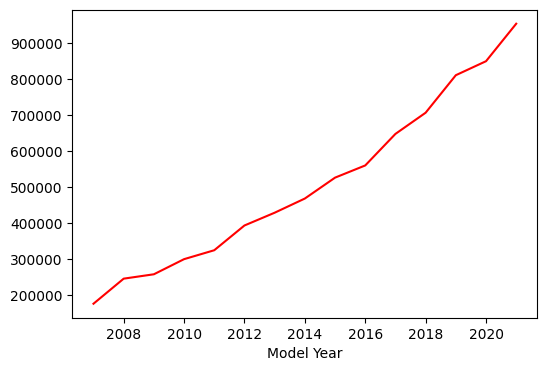

In [254]:
x3.plot(kind = "line", figsize = (6,4), color = "Red")